In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_csv('HeartDisease.csv')
data

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Checking Null Values

data.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [4]:
# Difference between +ve and -ve target value.

data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

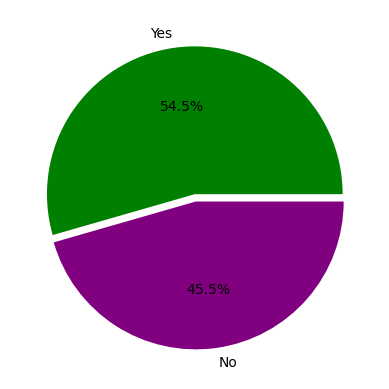

In [6]:
# Pie chart between +ve and -ve target value.

import plotly.graph_objects as go

explode=[.0,.05]
labels = ['Yes', 'No']
mycolors=['Green','Purple']
sizes= data['target'].value_counts().values
plt.pie(sizes,explode=explode,labels=labels,colors=mycolors,autopct='%1.1f%%')
plt.show()

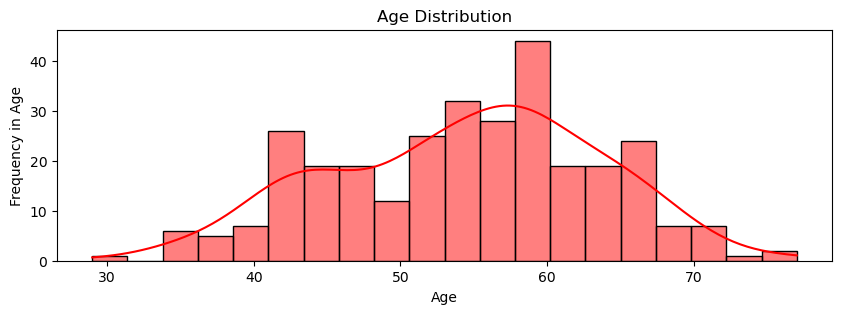

In [15]:
# Distribution for Age 

plt.figure(figsize=(10,3))
sns.histplot(data.age,bins = 20, kde = True, color = 'Red')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency in Age')
plt.show()

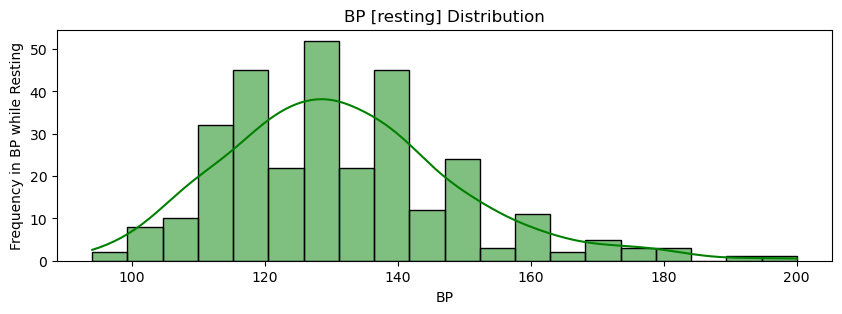

In [16]:
# Distribution for BP 

plt.figure(figsize=(10,3))
sns.histplot(data.rest_bps,bins = 20, kde = True, color = 'Green')

plt.title('BP [resting] Distribution')
plt.xlabel('BP')
plt.ylabel('Frequency in BP while Resting')
plt.show()

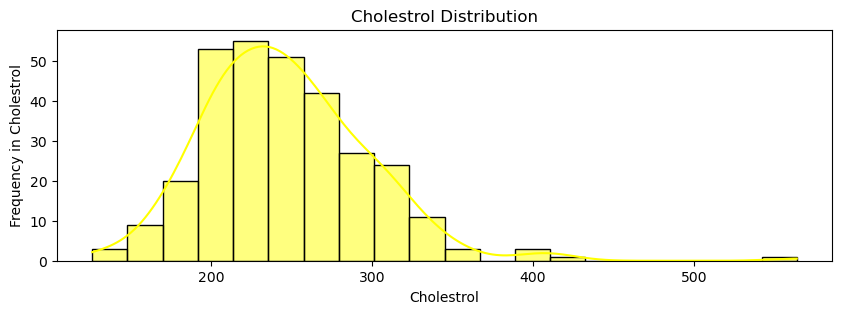

In [19]:
# Distribution for Cholestrol 

plt.figure(figsize=(10,3))
sns.histplot(data.cholestrol,bins = 20, kde = True, color = 'Yellow')

plt.title('Cholestrol Distribution')
plt.xlabel('Cholestrol')
plt.ylabel('Frequency in Cholestrol')
plt.show()

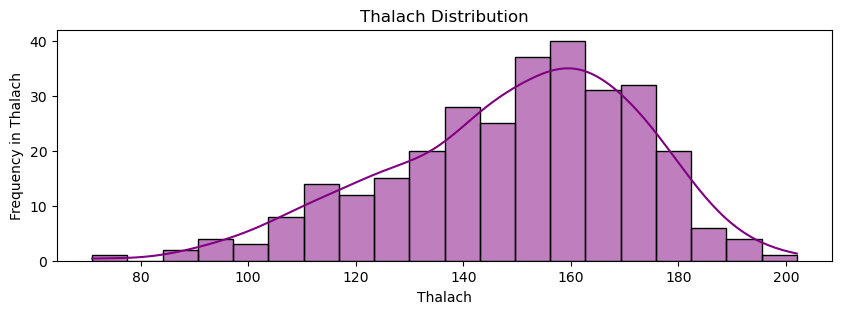

In [18]:
# Distribution for Thalach 

plt.figure(figsize=(10,3))
sns.histplot(data.thalach,bins = 20, kde = True, color = 'Purple')

plt.title('Thalach Distribution')
plt.xlabel('Thalach')
plt.ylabel('Frequency in Thalach')
plt.show()

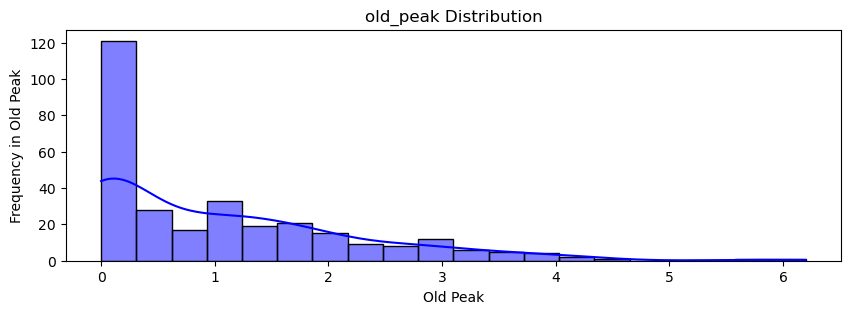

In [35]:
# Distribution for Old Peak 

plt.figure(figsize=(10,3))
sns.histplot(data.old_peak,bins = 20, kde = True, color = 'Blue')

plt.title('old_peak Distribution')
plt.xlabel('Old Peak')
plt.ylabel('Frequency in Old Peak')
plt.show()

In [22]:
# Selecting the cols which have only Numerical Data

data_num = data.select_dtypes(include = np.number)
data_num

# Dropping numerically set categorical data

data_num.drop(['gender','chest_pain', 'fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalassemia','target'], axis = 1, inplace = True)
data_num.head()

,age,rest_bps,cholestrol,thalach,old_peak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


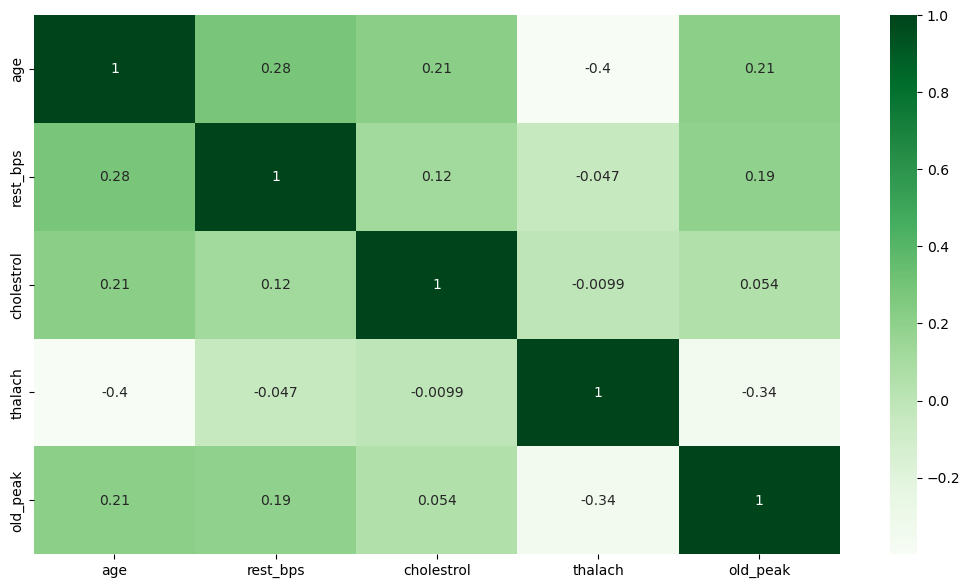

In [25]:
# Relation between these Numerical cols

plt.figure(figsize = (13,7))
sns.heatmap(data_num.corr(),annot = True, cmap = 'Greens')
plt.show()

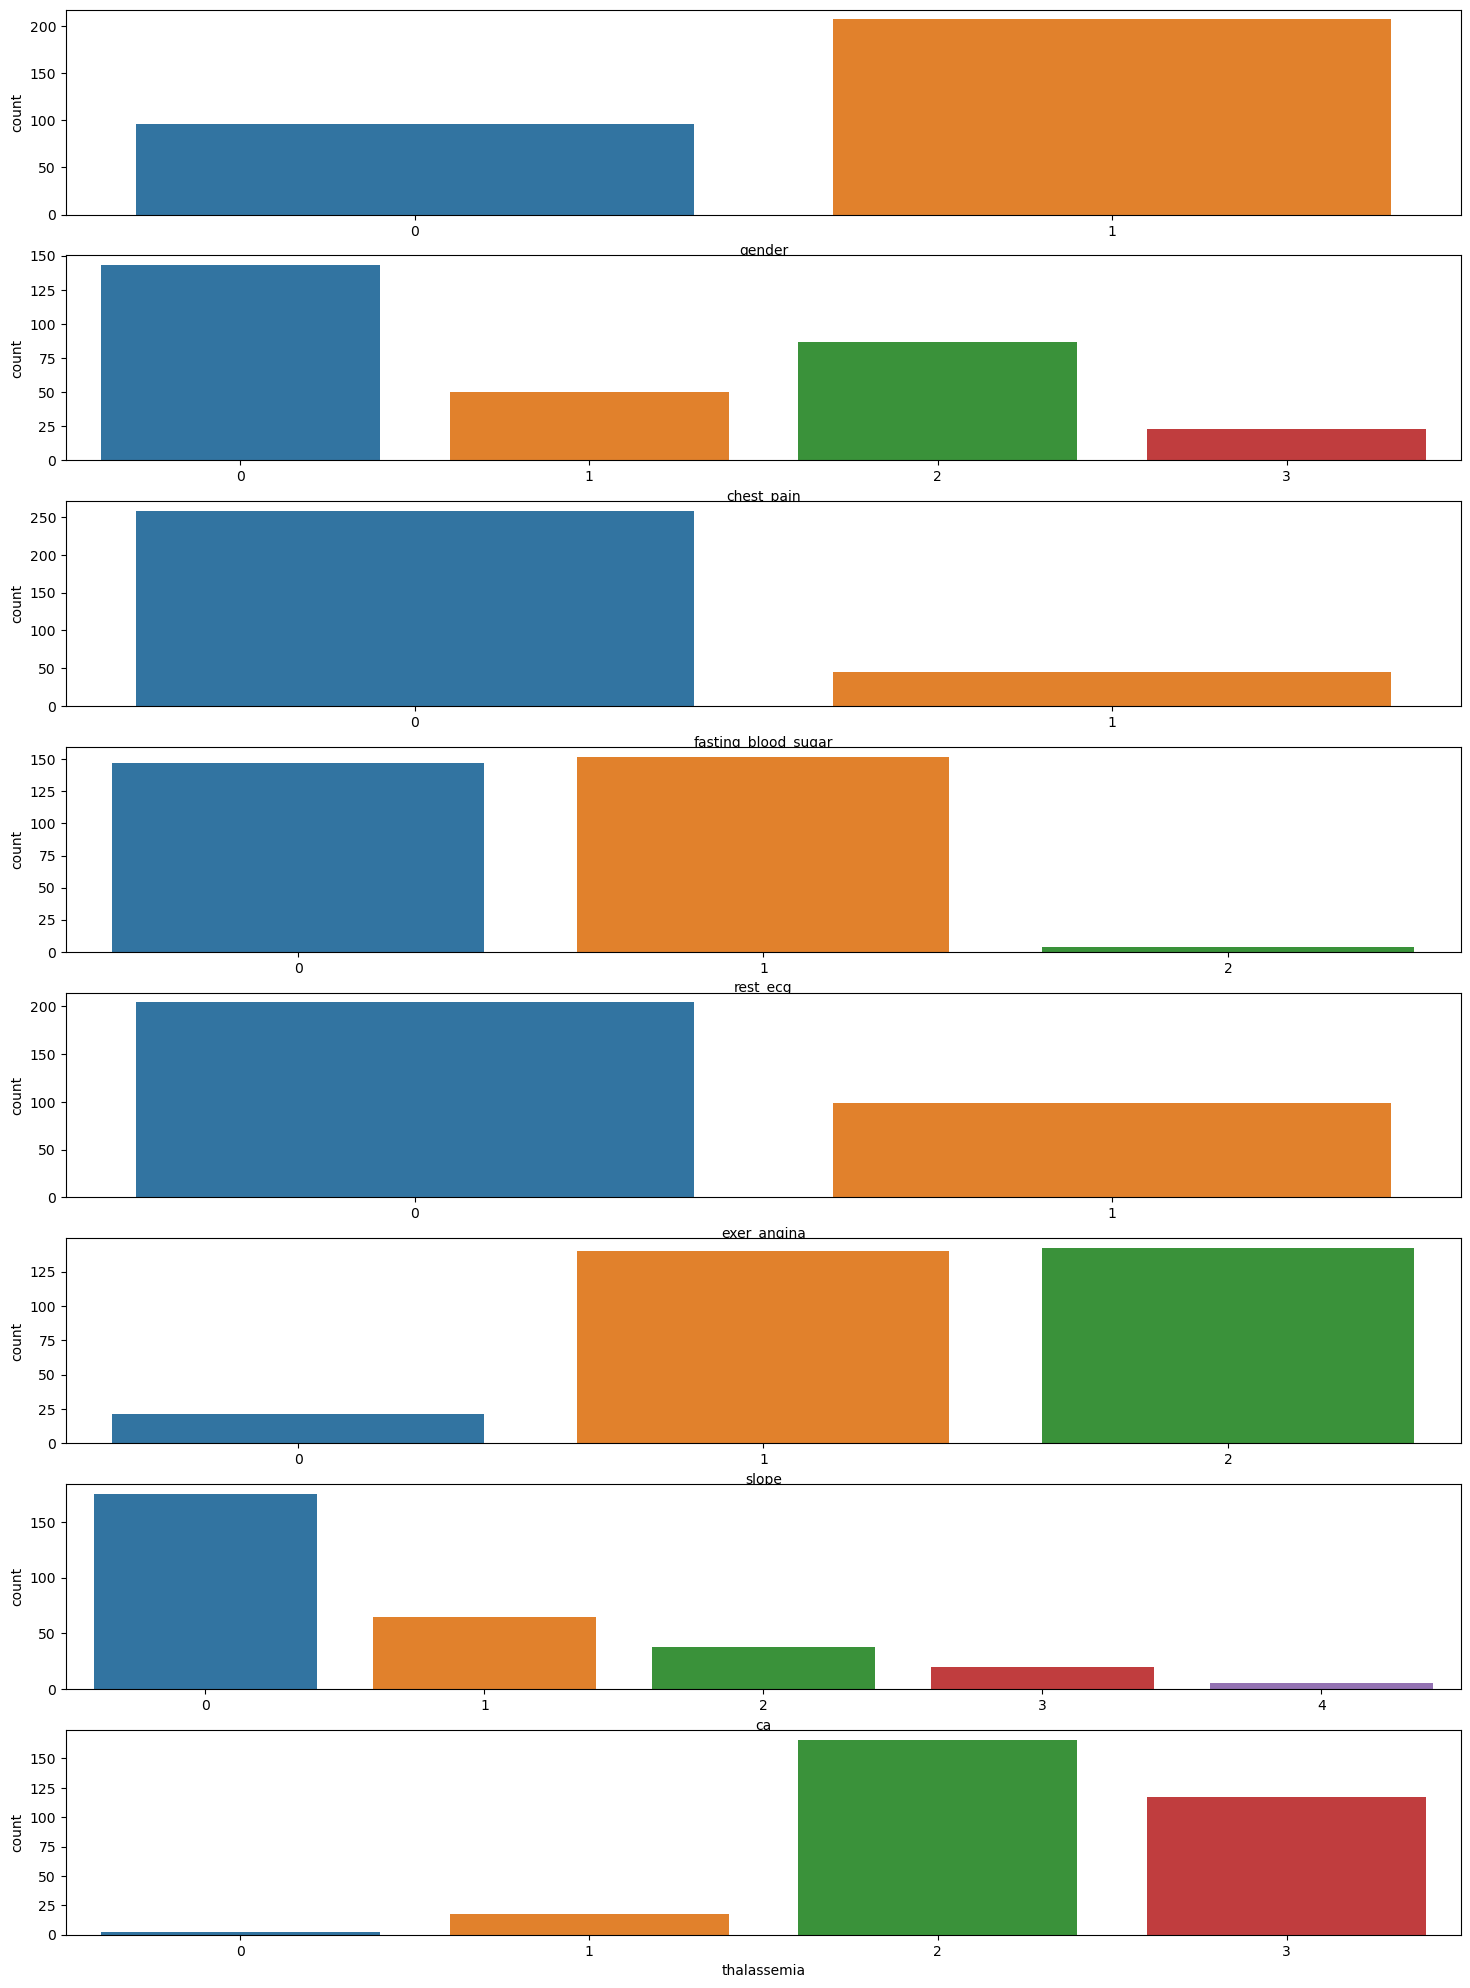

In [34]:
# Bi-Variate analysis of categorically set numerical data.

fig, ax = plt.subplots(8,1, figsize = (18,25))

cols = ['gender','chest_pain', 'fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalassemia']

for i, val in enumerate(cols):
    sns.countplot(x = val, data = data, ax = ax[i])

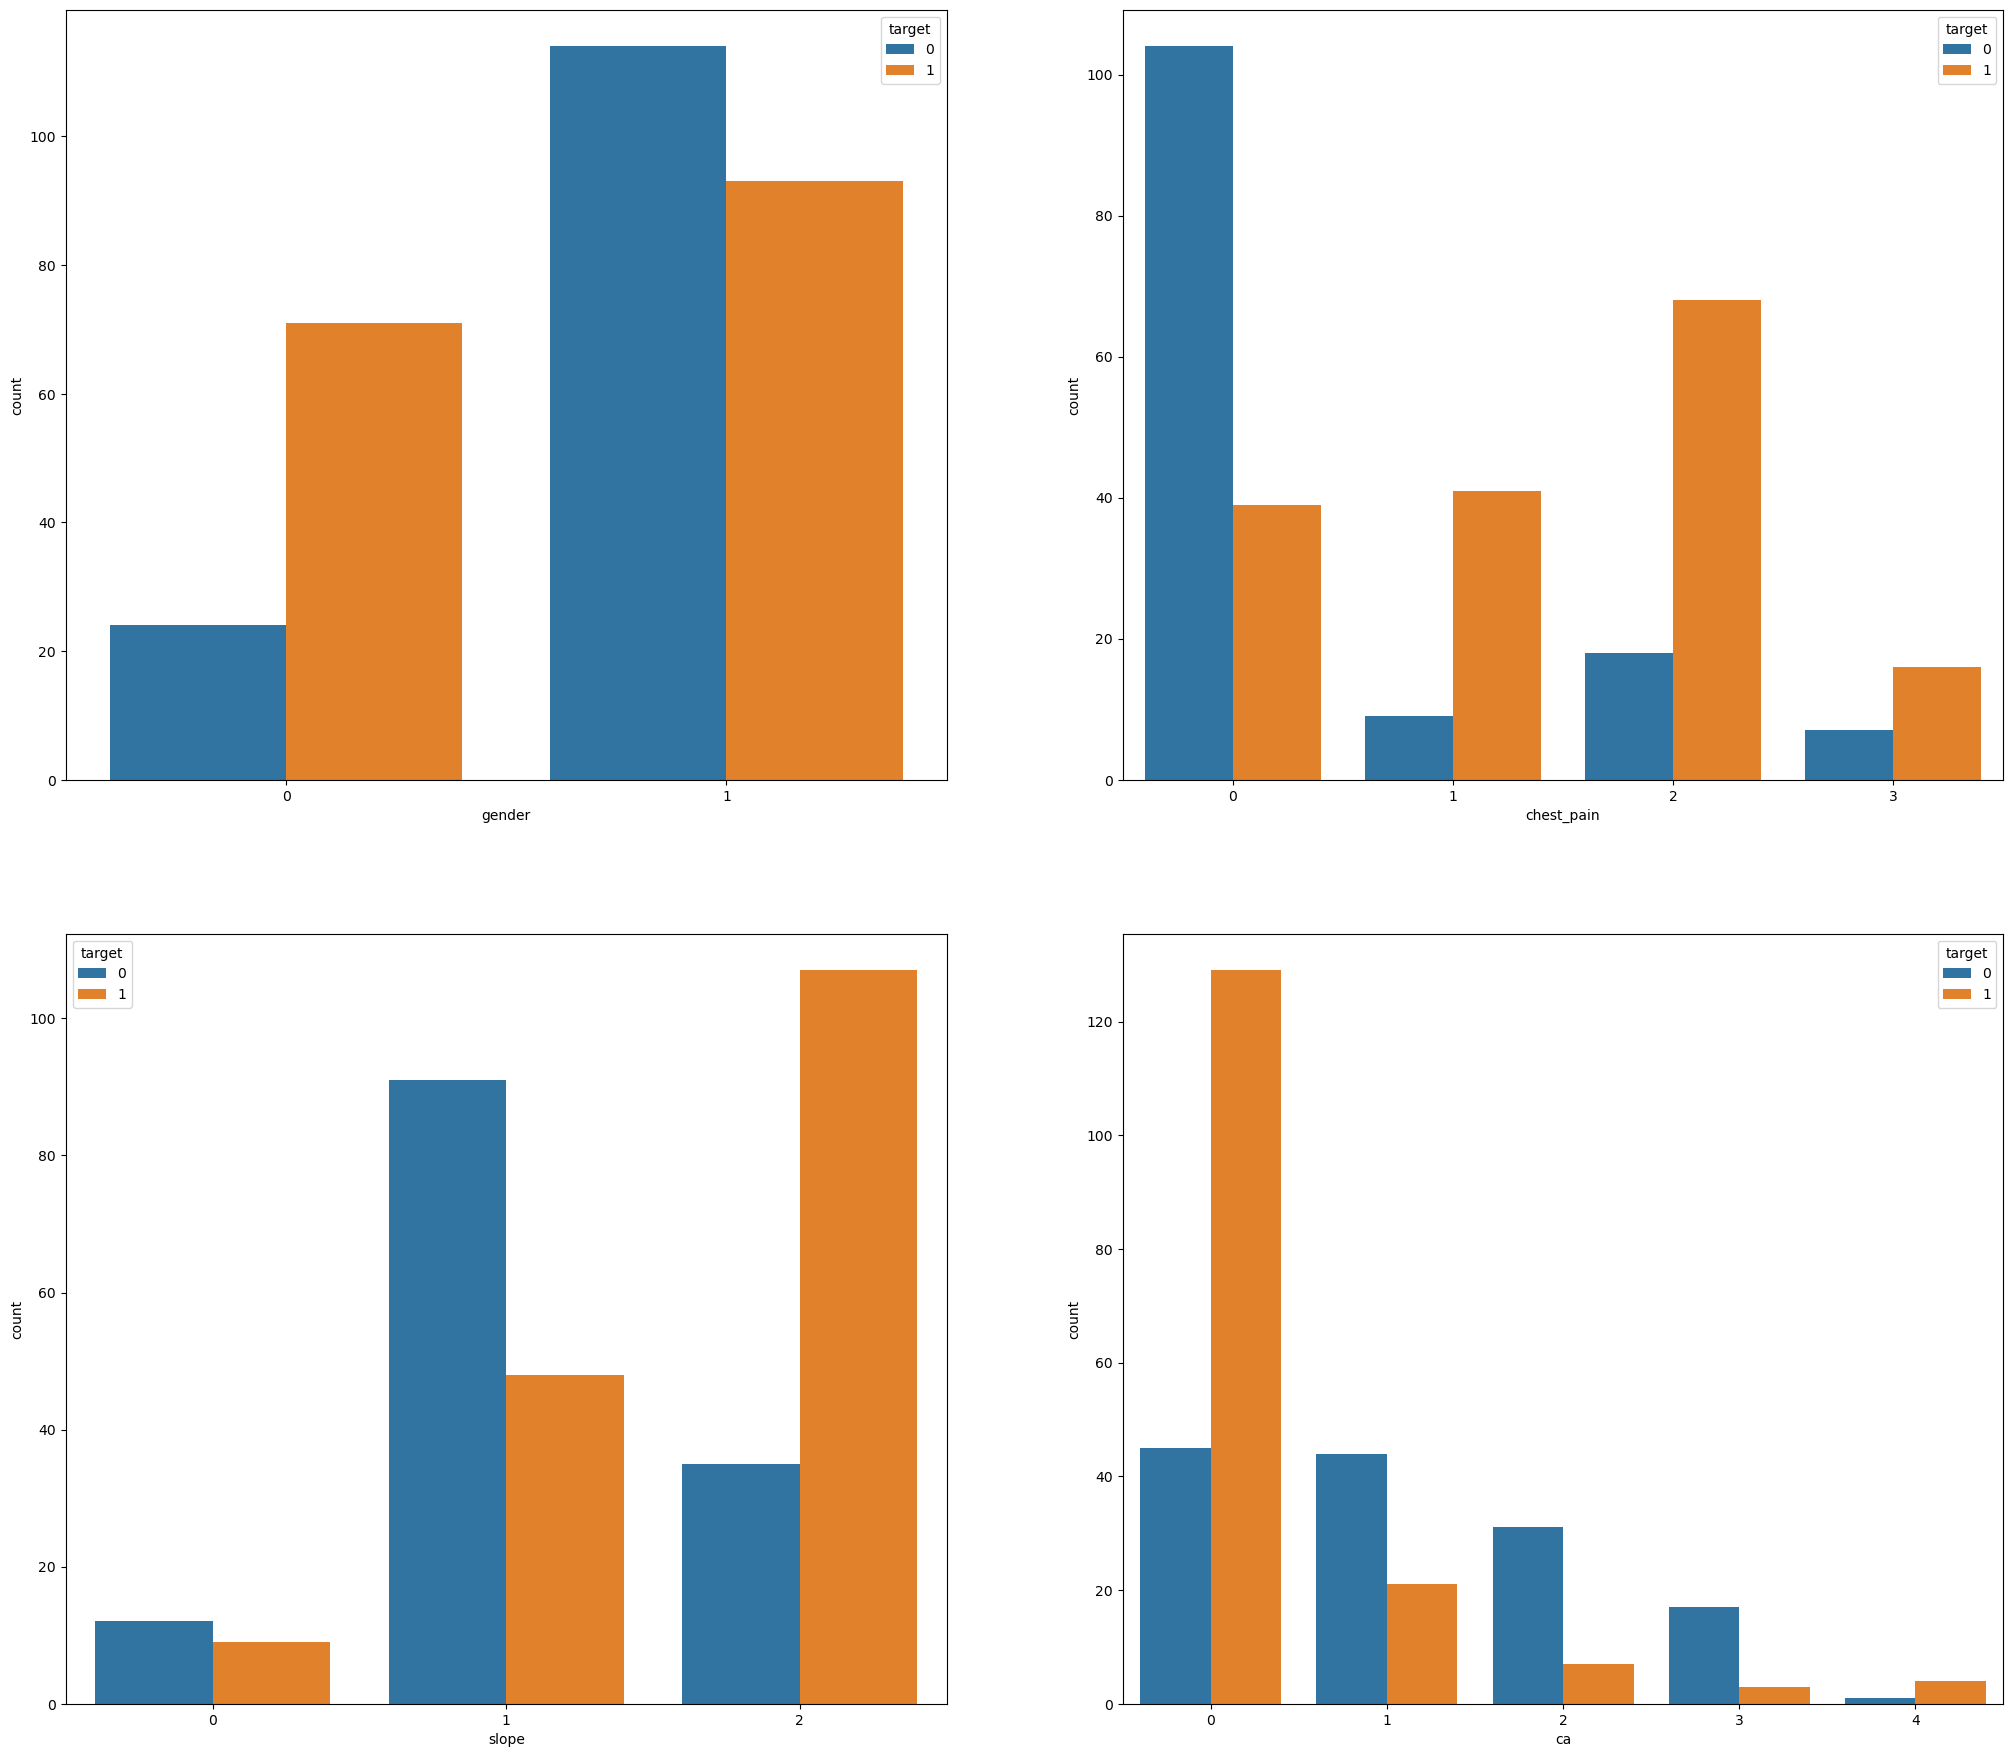

In [62]:
# Bi-Variate Anaylsing

fig,ax = plt.subplots(2,2,figsize=(25,22))

sns.countplot(x = 'gender',hue = 'target', data = data,ax=ax[0][0])
sns.countplot(x = 'chest_pain',hue = 'target', data = data, ax = ax[0][1])
sns.countplot(x = 'slope',hue = 'target', data = data, ax = ax[1][0])
sns.countplot(x = 'ca',hue = 'target', data = data, ax = ax[1][1])

plt.show()

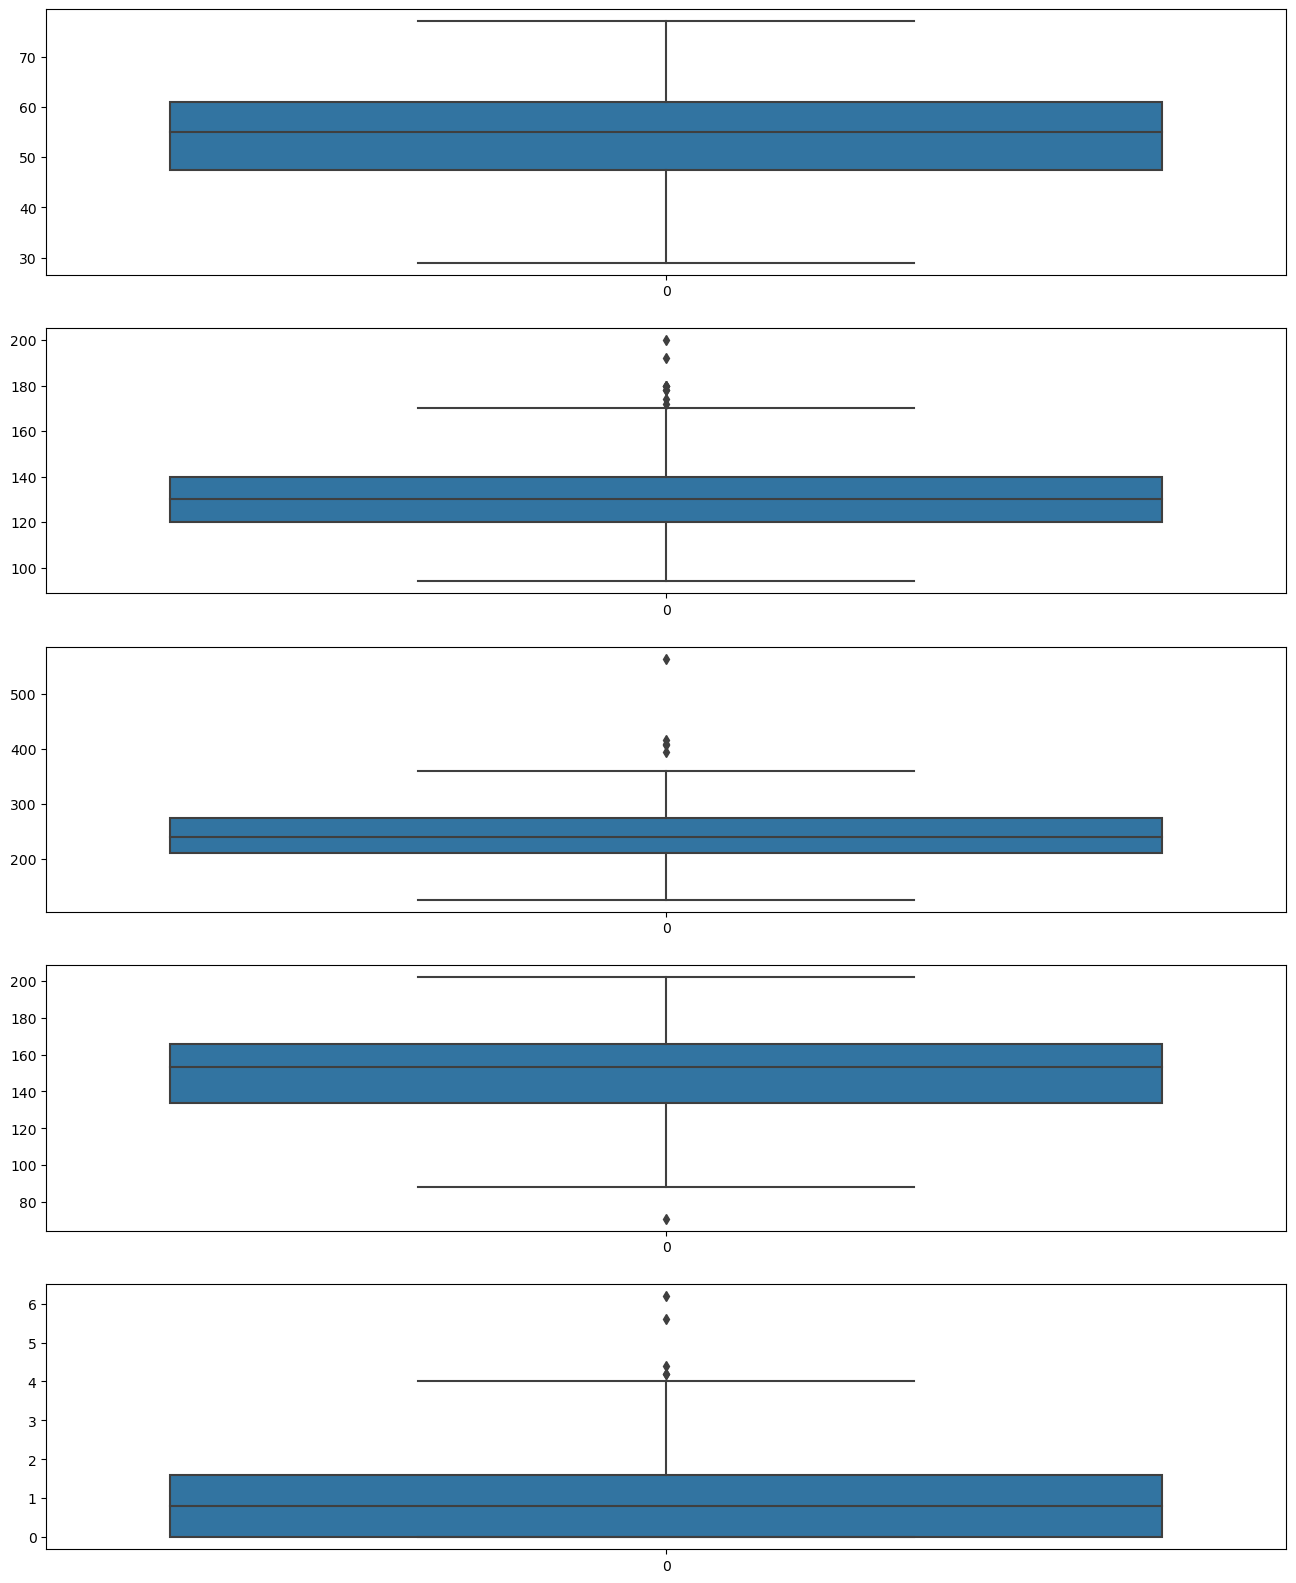

In [38]:
# Checking Outliers

fig, axs = plt.subplots(5,1, figsize = (16,20))

plt1 = sns.boxplot(data['age'], ax = axs[0])
plt1 = sns.boxplot(data['rest_bps'], ax = axs[1])
plt1 = sns.boxplot(data['cholestrol'], ax = axs[2])
plt1 = sns.boxplot(data['thalach'], ax = axs[3])
plt1 = sns.boxplot(data['old_peak'], ax = axs[4])

plt.show()

In [39]:
# Outliers Detection for Age

Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)

IQR = Q3 - Q1

data = data[(data['age'] >= Q1-3*IQR) & (data['age'] <= Q3+3*IQR)]
data

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [40]:
# Outliers Detection for BP

Q1 = data['rest_bps'].quantile(0.25)
Q3 = data['rest_bps'].quantile(0.75)

IQR = Q3 - Q1

data = data[(data['rest_bps'] >= Q1-3*IQR) & (data['rest_bps'] <= Q3+3*IQR)]
data

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [41]:
# Outliers Detection for Cholestrol

Q1 = data['cholestrol'].quantile(0.25)
Q3 = data['cholestrol'].quantile(0.75)

IQR = Q3 - Q1

data = data[(data['cholestrol'] >= Q1-3*IQR) & (data['cholestrol'] <= Q3+3*IQR)]
data

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [42]:
# Outliers Detection for Thalach

Q1 = data['thalach'].quantile(0.25)
Q3 = data['thalach'].quantile(0.75)

IQR = Q3 - Q1

data = data[(data['thalach'] >= Q1-3*IQR) & (data['thalach'] <= Q3+3*IQR)]
data

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [43]:
# Outliers Detection for Old Peak

Q1 = data['old_peak'].quantile(0.25)
Q3 = data['old_peak'].quantile(0.75)

IQR = Q3 - Q1

data = data[(data['old_peak'] >= Q1-3*IQR) & (data['old_peak'] <= Q3+3*IQR)]
data

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


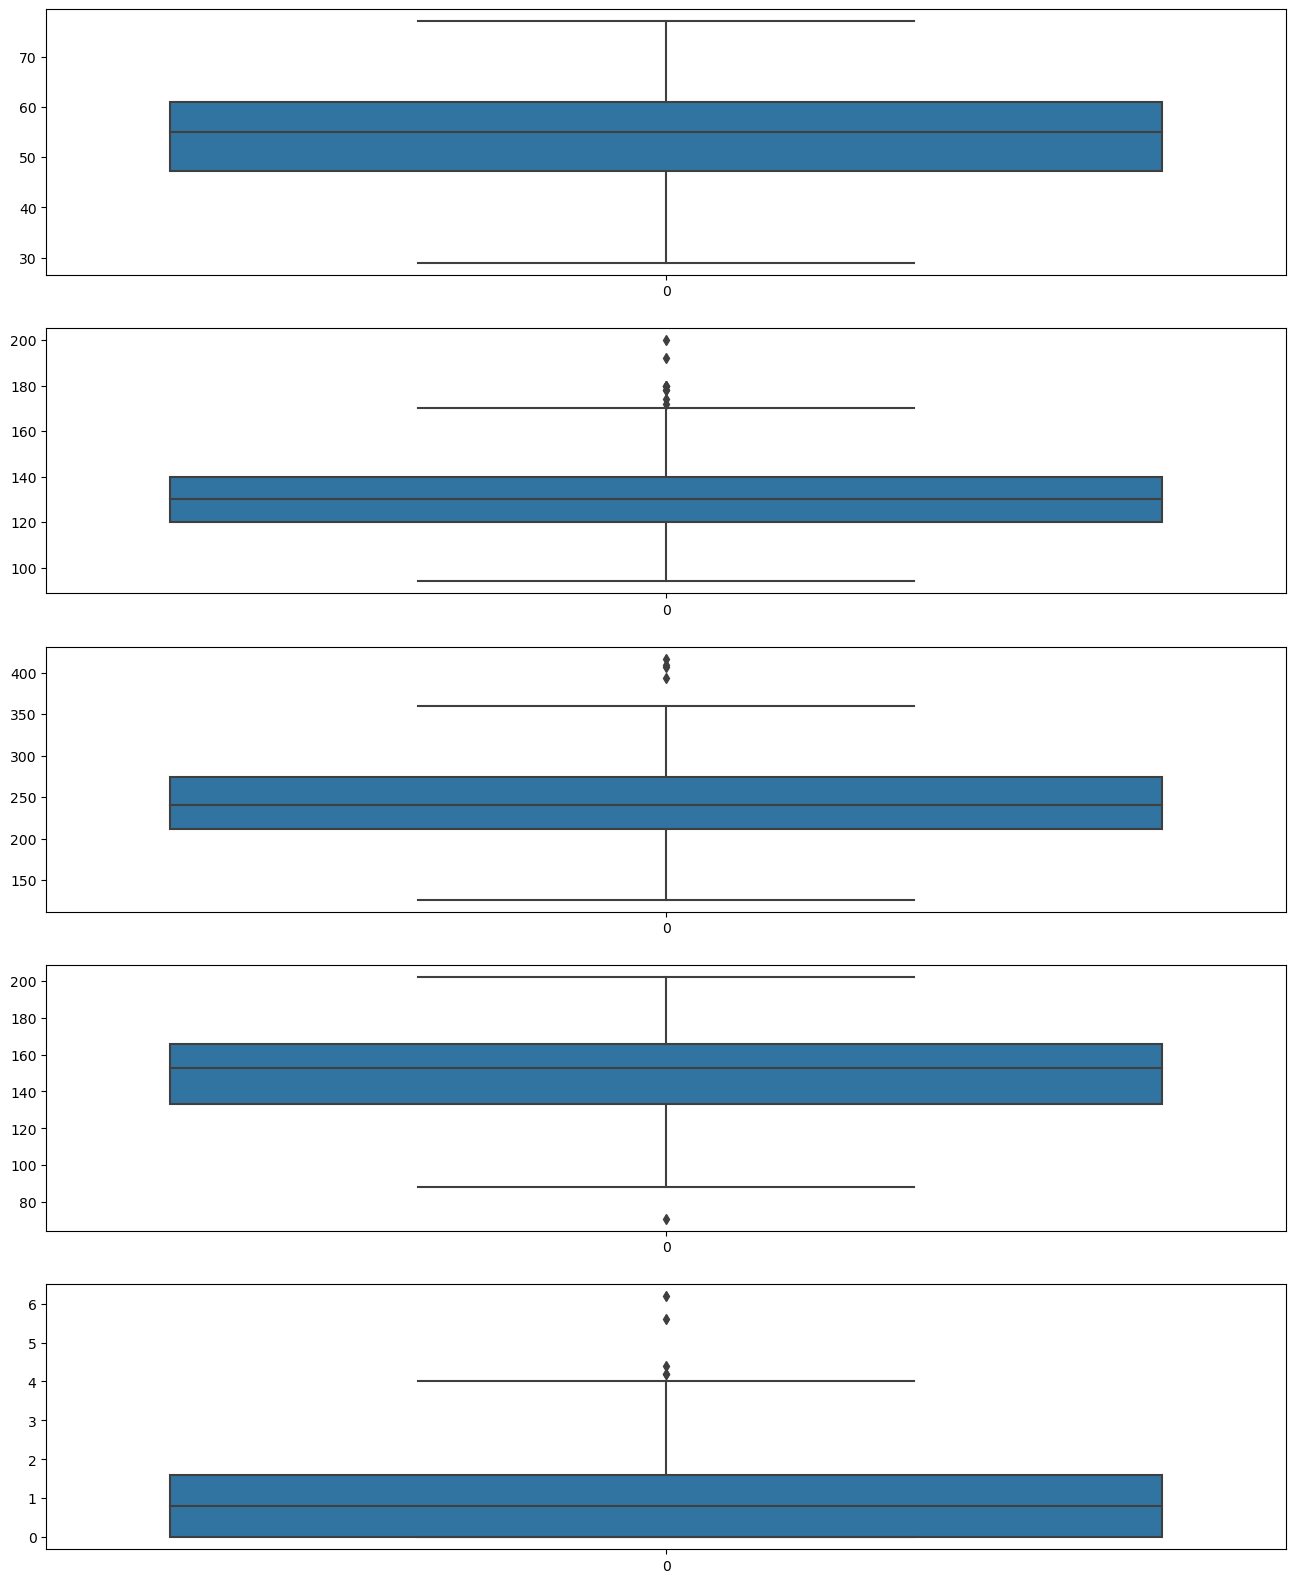

In [44]:
# Checking Outliers after

fig, axs = plt.subplots(5,1, figsize = (16,20))

plt1 = sns.boxplot(data['age'], ax = axs[0])
plt1 = sns.boxplot(data['rest_bps'], ax = axs[1])
plt1 = sns.boxplot(data['cholestrol'], ax = axs[2])
plt1 = sns.boxplot(data['thalach'], ax = axs[3])
plt1 = sns.boxplot(data['old_peak'], ax = axs[4])

plt.show()

In [45]:
from sklearn.feature_selection import chi2

x1 = data[['gender','chest_pain', 'fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalassemia']]
y1 = data['target']

score = chi2(x1,y1)
score

(array([ 7.33497011, 62.11608597,  0.1849456 ,  3.11029074, 38.51884879,
         9.93399835, 65.67391384,  5.92915602]),
 array([6.76258040e-03, 3.23795619e-15, 6.67157071e-01, 7.77990717e-02,
        5.42274293e-10, 1.62253704e-03, 5.32054549e-16, 1.48923727e-02]))

In [46]:
p_value = pd.Series(score[1], index = x1.columns)
p_value

gender                 6.762580e-03
chest_pain             3.237956e-15
fasting_blood_sugar    6.671571e-01
rest_ecg               7.779907e-02
exer_angina            5.422743e-10
slope                  1.622537e-03
ca                     5.320545e-16
thalassemia            1.489237e-02
dtype: float64

In [47]:
irr_cols = []

for x in p_value.index:
    if p_value[x] <= 0.05:
        print(x,':- Reject the null hypothesis.')
    else:
        print(x,':- Accept the null hypothesis.')
        irr_cols.append(x)

irr_cols

gender :- Reject the null hypothesis.
chest_pain :- Reject the null hypothesis.
fasting_blood_sugar :- Accept the null hypothesis.
rest_ecg :- Accept the null hypothesis.
exer_angina :- Reject the null hypothesis.
slope :- Reject the null hypothesis.
ca :- Reject the null hypothesis.
thalassemia :- Reject the null hypothesis.


['fasting_blood_sugar', 'rest_ecg']

In [48]:
# Dropping cols whose null hypothesis is accepted

data.drop('fasting_blood_sugar', axis = 1, inplace = True)
data.drop('rest_ecg', axis = 1, inplace = True)

In [49]:
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,150,0,2.3,0,0,1,1
1,37,1,2,130,250,187,0,3.5,0,0,2,1
2,41,0,1,130,204,172,0,1.4,2,0,2,1
3,56,1,1,120,236,178,0,0.8,2,0,2,1
4,57,0,0,120,354,163,1,0.6,2,0,2,1


In [50]:
x = data.drop('target', axis = 1)
y = data['target']

In [51]:
# Splitting data into train and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 25)

In [52]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((241, 11), (61, 11), (241,), (61,))

In [53]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [54]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
pred = dt.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score, classification_report, confusion_matrix

print('Accuracy score', accuracy_score(y_test,pred))
print('F1_score', f1_score(y_test,pred))
print('AUC score', roc_auc_score(y_test,pred))

Accuracy score 0.7704918032786885
F1_score 0.8108108108108107
AUC score 0.7554945054945056


In [63]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.65      0.71        26
           1       0.77      0.86      0.81        35

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



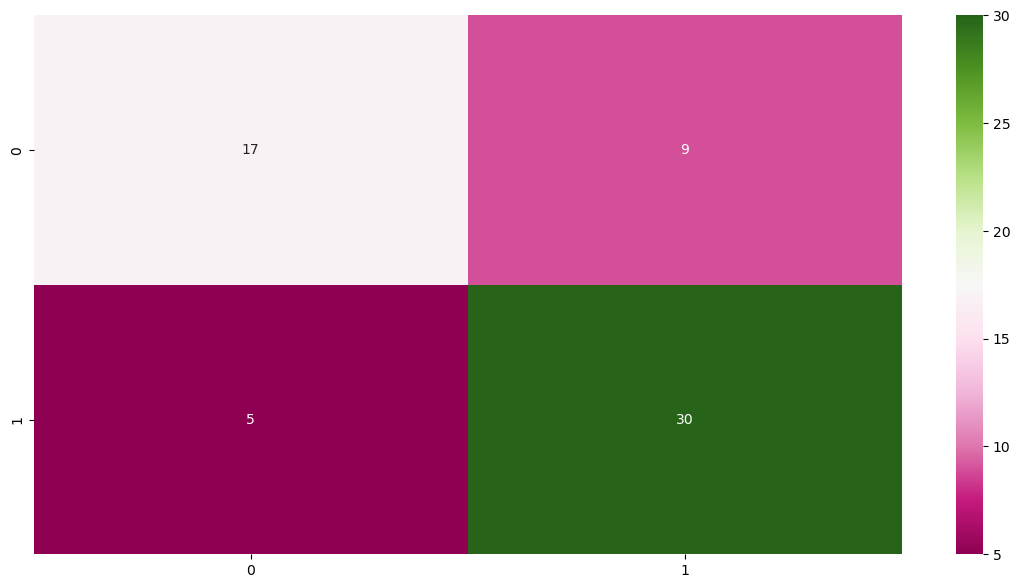

In [64]:
# Plotting Confusion Matrix 

cm = confusion_matrix(y_test,pred)

plt.figure(figsize = (14,7))
sns.heatmap(cm,annot = True, cmap = 'PiYG')

plt.show()

In [65]:
dt_tune = DecisionTreeClassifier(criterion='entropy',max_depth = 3,min_samples_split = 35)

In [66]:
dt_tune.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=35)

In [67]:
# Making prediction 

pred_t = dt_tune.predict(x_test)

In [68]:
print(classification_report(y_test,pred_t))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        26
           1       0.75      0.94      0.84        35

    accuracy                           0.79        61
   macro avg       0.82      0.76      0.77        61
weighted avg       0.81      0.79      0.78        61



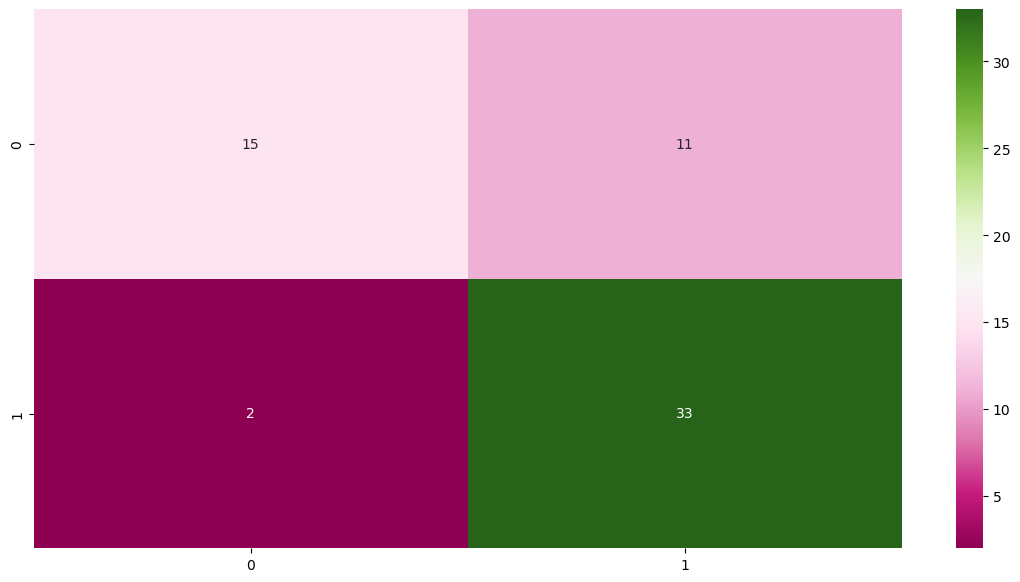

In [69]:
# Plotting Confusion Matrix 

cm = confusion_matrix(y_test,pred_t)

plt.figure(figsize = (14,7))
sns.heatmap(cm,annot = True, cmap = 'PiYG')

plt.show()

In [70]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [71]:
#Maximum number of levels in tree
max_depth =[int(x) for x in np.linspace(3,50,20)]

# Minimum number of samples required to split a node
min_samples_split=[5,8,10,12,15,20,30,35,40]

param_grid= {'max_depth': max_depth,'min_samples_split': min_samples_split,'criterion':['entropy','gini impurity']}

In [72]:
grid_model = GridSearchCV(dt,param_grid, cv = 3)

In [73]:
grid_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini\xa0impurity'],
                         'max_depth': [3, 5, 7, 10, 12, 15, 17, 20, 22, 25, 27,
                                       30, 32, 35, 37, 40, 42, 45, 47, 50],
                         'min_samples_split': [5, 8, 10, 12, 15, 20, 30, 35,
                                               40]})

In [74]:
grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 5}

In [75]:
dt_grid = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_split = 5)

In [76]:
dt_grid.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5)

In [77]:
# Makes Prediction

pred_g = dt_grid.predict(x_test)

In [78]:
print(classification_report(y_test,pred_g))

              precision    recall  f1-score   support

           0       0.77      0.65      0.71        26
           1       0.77      0.86      0.81        35

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



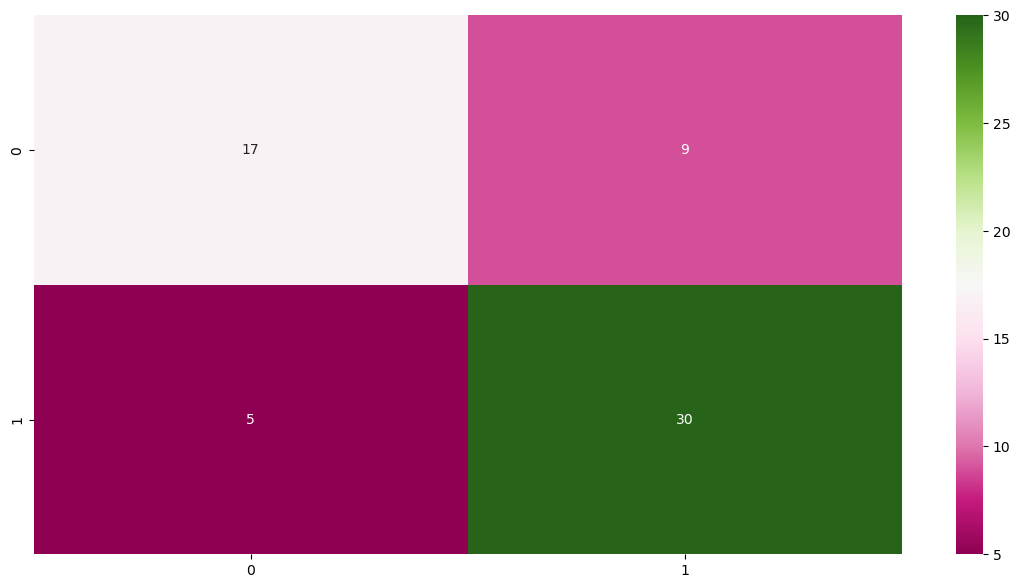

In [79]:
# Plotting Confusion Matrix 

cm = confusion_matrix(y_test,pred_g)

plt.figure(figsize = (14,7))
sns.heatmap(cm,annot = True, cmap = 'PiYG')

plt.show()

In [80]:
grid_model.best_score_

0.8173353909465021

In [92]:
random_model = RandomizedSearchCV(dt,param_grid, cv = 3)

In [93]:
random_model.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy',
                                                      'gini\xa0impurity'],
                                        'max_depth': [3, 5, 7, 10, 12, 15, 17,
                                                      20, 22, 25, 27, 30, 32,
                                                      35, 37, 40, 42, 45, 47,
                                                      50],
                                        'min_samples_split': [5, 8, 10, 12, 15,
                                                              20, 30, 35, 40]})

In [94]:
random_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10)

In [95]:
random_model.best_params_

{'min_samples_split': 10, 'max_depth': 3, 'criterion': 'entropy'}

In [96]:
dt_random = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10)

In [97]:
dt_random.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10)

In [98]:
# Makes Prediction

pred_r = dt_random.predict(x_test)

In [99]:
print(classification_report(y_test,pred_r))

              precision    recall  f1-score   support

           0       0.77      0.65      0.71        26
           1       0.77      0.86      0.81        35

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



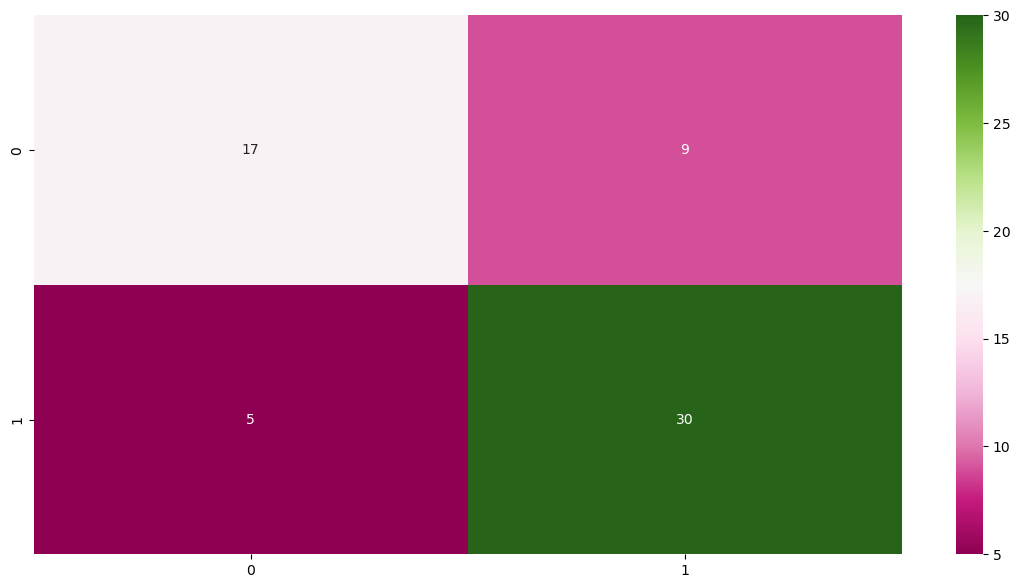

In [100]:
# Plotting Confusion Matrix 

cm = confusion_matrix(y_test,pred_r)

plt.figure(figsize = (14,7))
sns.heatmap(cm,annot = True, cmap = 'PiYG')

plt.show()

In [101]:
random_model.best_score_

0.8173353909465021